# MONKEYPOX PREDICTION

## BUSINESS UNDERSTANDING

### __Overview__

Monkeypox, according to the Centers for Disease Control and Prevention, is an uncommon disease caused by infection with the monkeypox virus. Monkeypox virus is part of the same family of viruses as variola virus, the virus that causes smallpox. Monkeypox symptoms are similar to smallpox symptoms, but milder, and monkeypox is rarely fatal.
Monkeypox was discovered in 1958 when two outbreaks of a pox-like disease occurred in colonies of monkeys kept for research. Despite being named “monkeypox,” the source of the disease remains unknown. However, African rodents and non-human primates (like monkeys) might harbor the virus and infect people.

The first human case of monkeypox was recorded in 1970. Prior to the 2022 outbreak in May, monkeypox had been reported in people in several central and western African countries. Previously, almost all monkeypox cases in people outside of Africa were linked to international travel to countries where the disease commonly occurs or through imported animals. These cases occurred on multiple continents.

```Transmission```: Monkeypox is a viral zoonosis (virus transmitted to humans from animals)It is transmitted through close contact with an infected person or animal, body fluids, respiratory droplets and contaminated materials such as bedding.

### __Problem Statement__

As more cases of monkeypox emerge, the world becomes increasingly concerned, as they do not want a repeat of what happened not too long ago, when the infamous Covid-19 broke out and altered the world as we know it. Faced with the reality that such viral diseases can actually shut down the planet, the organization must develop ways to reduce the spread of this disease, enter the Health authorities in the United Kingdom, they have established an incident management team to coordinate the extensive contact tracing  in regards to how quickly the virus can be transferred and, worse, mutate into a more lethal variant.

On July 23, the World Health Organization declared the outbreak “a public health emergency of international concern.” Another thing you should know about monkeypox is that it is extremely unpleasant. The current strain has a 1% mortality rate, and as of this writing, there have been three deaths reported in outbreaks outside of Africa, and five deaths in African countries where the disease is endemic, since the beginning of the year.
The West African strain of the monkeypox virus is associated with milder disease and fewer deaths than the Central African strain.

Even if the chances of death are low, patients with monkeypox have reported how painful and debilitating the disease is. "People may experience flu-like symptoms at first, such as fever and headache, but as the disease progresses, you get a multi-stage rash, lesions can develop in your mouth, feet, and genital region, and these develop into pus-filled blisters."Symptoms can appear between five and 21 days after infection, though the average incubation period is 6 to 13 days. For the first few days, there are headaches, fever, muscle aches, and fatigue.

As students of the Incident Management team we have been tasked to create a model to accurately identify potential infected persons in order to make contact tracing faster and more efficient, thereby halting the spread.

### __Proposed Solution__

One proposed solution is to cultivate the use of data in attempting to predict whether or not a person has monkeypox in order to make contact tracing easier.

### __Specific Objectives__

* To predict whether a patient is negative or positive for monkeypox based on the symptoms they exhibit 
* To analyze the various variables such as Sore Throat,Penile Oedema, Oral Lesions ,Systemic illness and STIs and know their relationship with monkeypox 

### __Research Questions__

* Which model best predicts monkeypox disease?
* Which symptom has the highest correlation to monkeypox?
* Which symptom has the lowest correlation to monkeypox?

### __Success Criteria__

Tentatively, the study will be judged a success if, we build a model(****We'll add it once we figure out which kind of models we will use. Since we are using at least two models****) to predict monkeypox with an accuracy,precision and recall of 70% or more in classification



## Importing Libraries

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [35]:
# Defining relevant functions

def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="right")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

## Loading Data

In [6]:
# Loading the data using pandas into mp {Monkey Pox}

# Index_col sets the index to be the patient id as there is no need to have more than one unique identifiers.

mp = pd.read_csv('DATA.csv', index_col= 0)

## DATA UNDERSTANDING

### __Overview__

We are using a SYNTHETIC dataset generated from a study published by the British Medical Journal. It is a description of the clinical features and novel presentations of human monkeypox during the outbreak of 2022 in central London. 

The data has already been loaded in the above code cell.

In [33]:
# preview of the first 5 rows
mp.head()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
Patient_ID,,,,,,,,,,
P0,None,False,True,True,True,False,True,False,False,Negative
P1,Fever,True,False,True,True,False,False,True,False,Positive
P2,Fever,False,True,True,False,False,False,True,False,Positive
P3,None,True,False,False,False,True,True,True,False,Positive
P4,Swollen Lymph Nodes,True,True,True,False,False,True,True,False,Positive


In [34]:
# Checking the summary of the data

mp.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25000 entries, P0 to P24999
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Systemic Illness                25000 non-null  object
 1   Rectal Pain                     25000 non-null  bool  
 2   Sore Throat                     25000 non-null  bool  
 3   Penile Oedema                   25000 non-null  bool  
 4   Oral Lesions                    25000 non-null  bool  
 5   Solitary Lesion                 25000 non-null  bool  
 6   Swollen Tonsils                 25000 non-null  bool  
 7   HIV Infection                   25000 non-null  bool  
 8   Sexually Transmitted Infection  25000 non-null  bool  
 9   MonkeyPox                       25000 non-null  object
dtypes: bool(8), object(2)
memory usage: 1.4+ MB


In [7]:
# checking for duplicates using the index as a guide as the index is the personal id
mp.index.duplicated().sum()

0

In [36]:
# viewing the column names of the dataset 

mp.columns

Index(['Systemic Illness', 'Rectal Pain', 'Sore Throat', 'Penile Oedema',
       'Oral Lesions', 'Solitary Lesion', 'Swollen Tonsils', 'HIV Infection',
       'Sexually Transmitted Infection', 'MonkeyPox'],
      dtype='object')

In [28]:
# Making a list of all the bool columns to use in get_dummies later

col = list(mp.columns)

col.remove('Systemic Illness')
col

['Rectal Pain',
 'Sore Throat',
 'Penile Oedema',
 'Oral Lesions',
 'Solitary Lesion',
 'Swollen Tonsils',
 'HIV Infection',
 'Sexually Transmitted Infection',
 'MonkeyPox']

In [38]:
# preview of the list of column names

col

['Rectal Pain',
 'Sore Throat',
 'Penile Oedema',
 'Oral Lesions',
 'Solitary Lesion',
 'Swollen Tonsils',
 'HIV Infection',
 'Sexually Transmitted Infection',
 'MonkeyPox']

In [39]:
# checking the summary statistics of the data
mp.describe()

,Systemic Illness,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection,MonkeyPox
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,4,2,2,2,2,2,2,2,2,2
top,Fever,False,True,True,False,True,True,True,False,Positive
freq,6382,12655,12554,12612,12514,12527,12533,12584,12554,15909


In [40]:
# shape of the data
mp.shape

(25000, 10)

__Summary__

* Our data has 25,000 rows and 10 columns
* The data has 8 columns of dtype ```Bool``` and 2 columns of dtype ```object```.
* There are no missing columns in the data.
* There are no duplicates in the data.
* The following are the columns in our data;
    * Systemic Illness 
    * Rectal Pain 
    * Sore Throat 
    * Penile Oedema
    * Oral Lesions 
    * Solitary Lesion 
    * Swollen Tonsils 
    * HIV Infection
    * Sexually Transmitted Infection
    * MonkeyPox

Since the data has no duplicates and missing values, we can go ahead and do Exploratory Data Analysis to gain more insights from the data.

### Exploratory Data Analysis

__UNIVARIATE ANALYSIS__

__Feature columns__

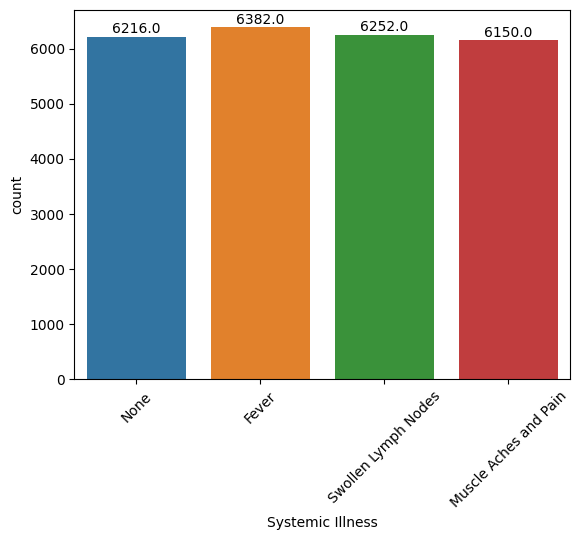

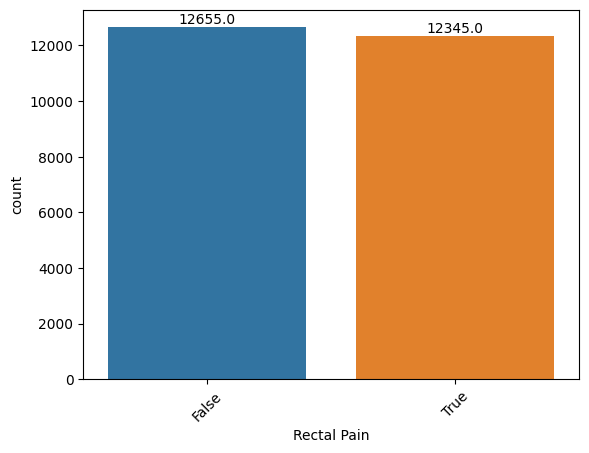

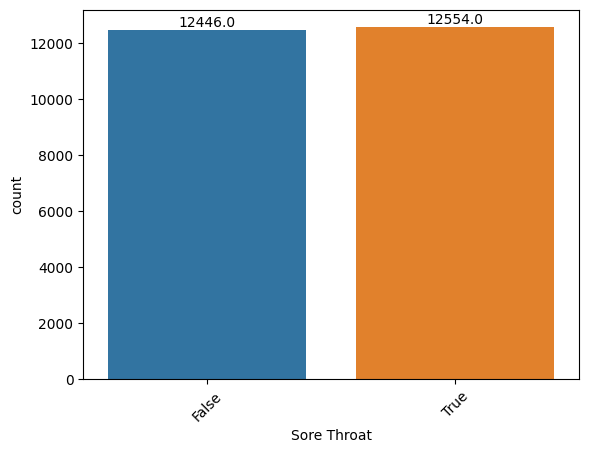

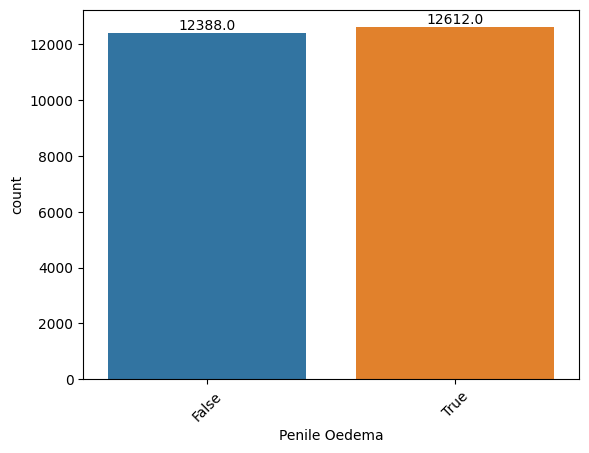

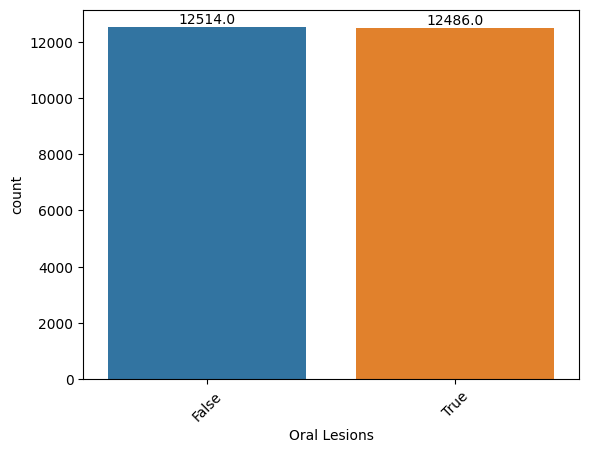

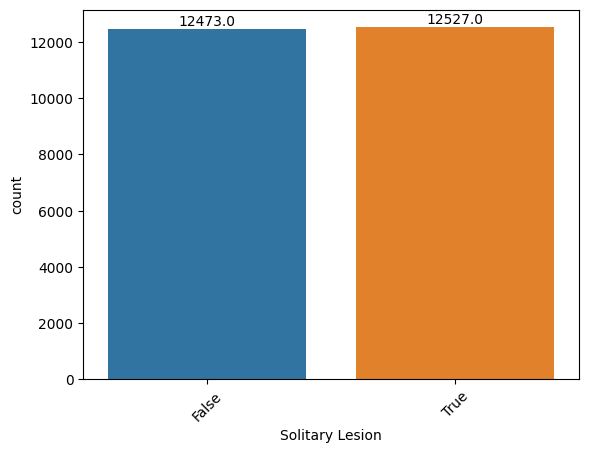

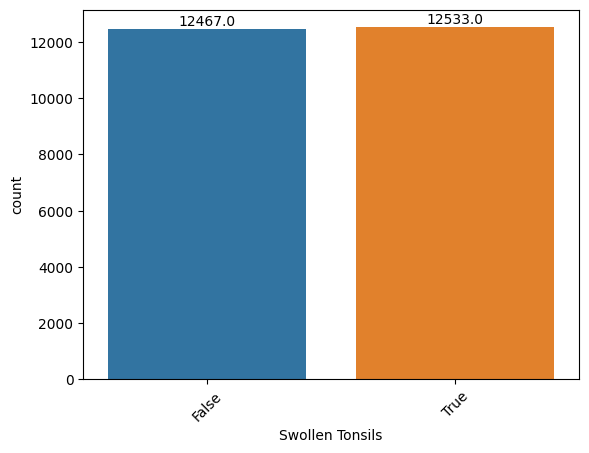

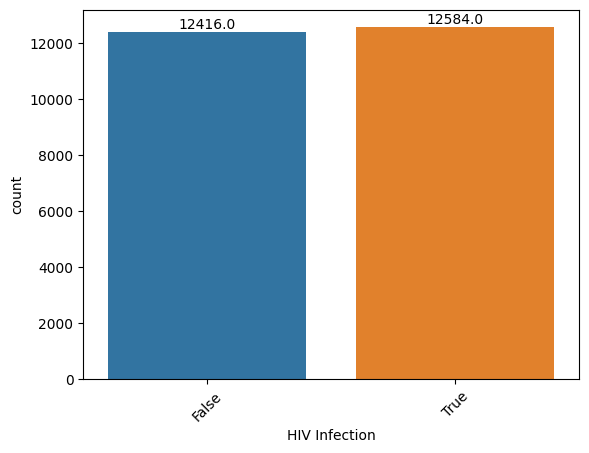

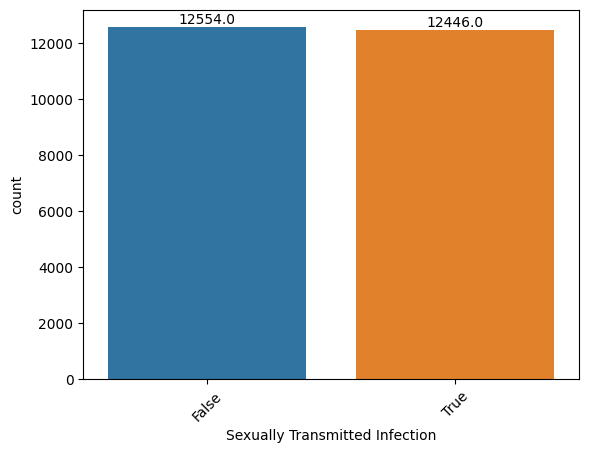

In [13]:
for column in mp.columns:
    if column != 'MonkeyPox':
        plt.figure()
        p = sns.countplot(x=mp[column])
        p.tick_params(axis='x', rotation=45)
#         plt.xticks(rotation = "45")
        show_values(axs= p, orient= 'v')

__Target column__

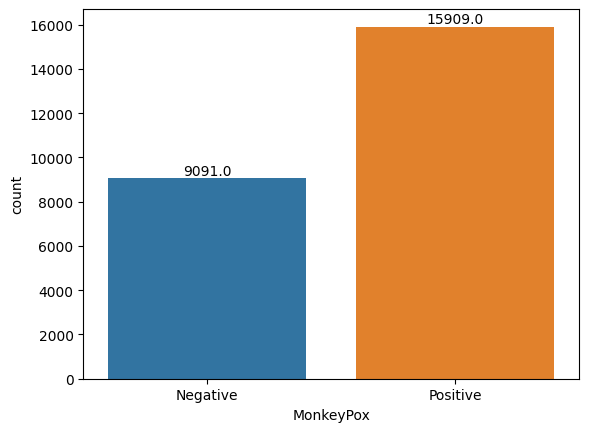

In [15]:
ax = sns.countplot(x = mp["MonkeyPox"])
show_values(axs= ax, orient= 'v');

__Univariate Analysis summary__

* From the above, all symptoms have a uniform distribution based on whether it is true or false.
* For the systemic illnesses, fever has the highest frequency.
* For the target column, the number of those with monkey pox is higher than those without the monkeypox therefore there is a class imbalance in our target column.

__BIVARIATE ANALYSIS__



In [17]:
# Grouping the data by monkey pox in order to find the sum of various symptoms baseed on MonkeyPox
values = mp.groupby(by="MonkeyPox").sum().reset_index()
values

,MonkeyPox,Rectal Pain,Sore Throat,Penile Oedema,Oral Lesions,Solitary Lesion,Swollen Tonsils,HIV Infection,Sexually Transmitted Infection
0,Negative,3643,4184,4214,4228,4330,4478,3697,3784
1,Positive,8702,8370,8398,8258,8197,8055,8887,8662


***HIV Infection vs MonkeyPox***

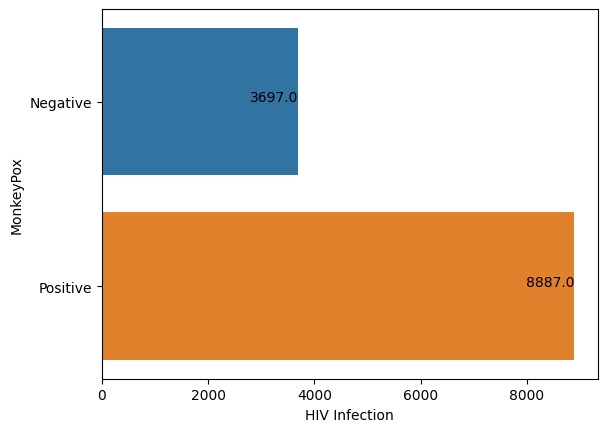

In [36]:
ax = sns.barplot(x = "HIV Infection", y = "MonkeyPox", data = values)
show_values(axs= ax, orient= 'h')

***Rectal Pain vs MonkeyPox***

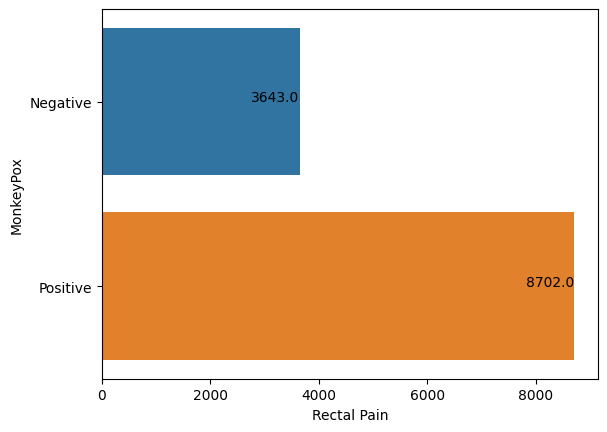

In [37]:
ax = sns.barplot(x = "Rectal Pain", y = "MonkeyPox", data = values)
show_values(axs= ax, orient= 'h')

***Sore Throat vs MonkeyPox***

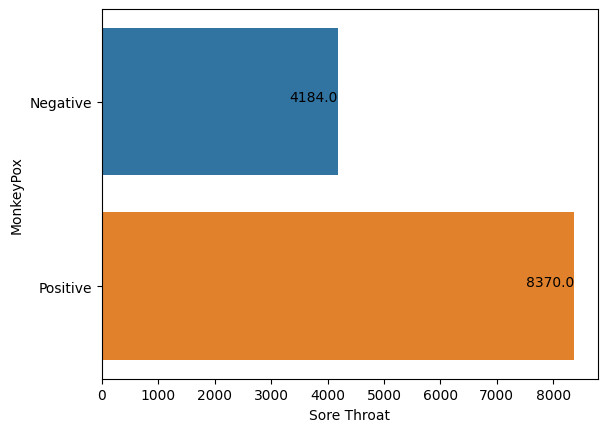

In [38]:
ax = sns.barplot(x = "Sore Throat", y = "MonkeyPox", data = values)
show_values(axs= ax, orient= 'h')

***Penile Oedema vs MonkeyPox***

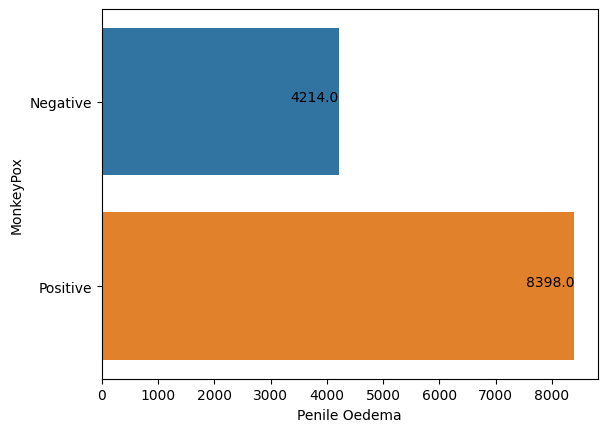

In [39]:
ax = sns.barplot(x = "Penile Oedema", y = "MonkeyPox", data = values)
show_values(axs= ax, orient= 'h')

***Oral Lesions vs MonkeyPox***

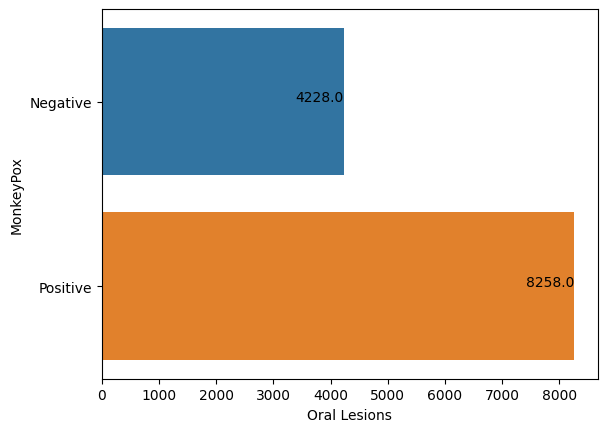

In [40]:
ax = sns.barplot(x = "Oral Lesions", y = "MonkeyPox", data = values)
show_values(axs= ax, orient= 'h')

***Solitary Lesion vs MonkeyPox***

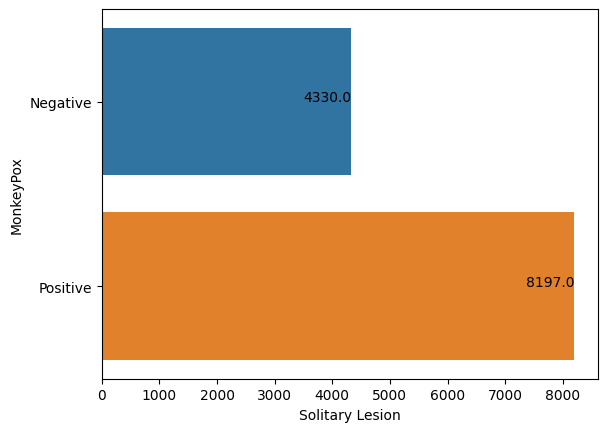

In [41]:
ax  = sns.barplot(x = "Solitary Lesion", y = "MonkeyPox", data = values)
show_values(axs= ax, orient= 'h')

***Swollen Tonsils vs MonkeyPox***

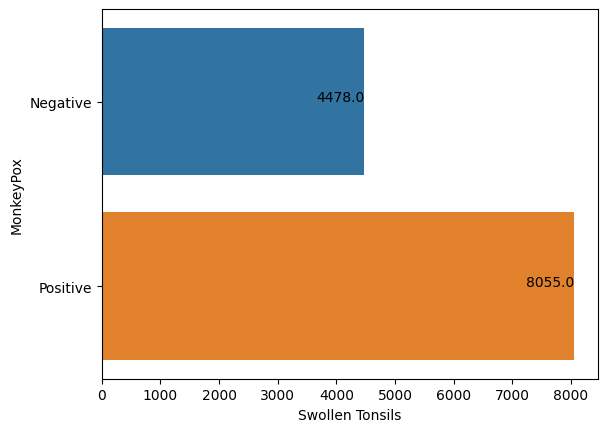

In [42]:
ax = sns.barplot(x = "Swollen Tonsils", y = "MonkeyPox", data = values)
show_values(axs= ax, orient= 'h')

***Sexually Transmitted Infection vs MonkeyPox***

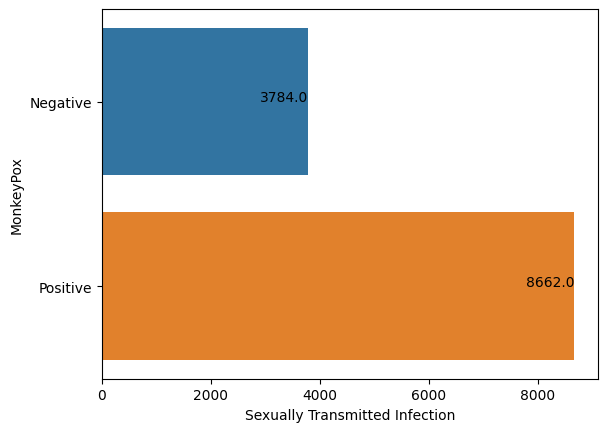

In [43]:
ax = sns.barplot(x = "Sexually Transmitted Infection", y = "MonkeyPox", data = values)
show_values(axs= ax, orient= 'h')

__Bivariate Analysis Summary__

* People with the symptoms of ```HIV Infection```, ```Rectal Pain``` and ```Sexually Transmitted Infection``` have a high chance of being MonkeyPox positive.

__MULTIVARIATE ANALYSIS__

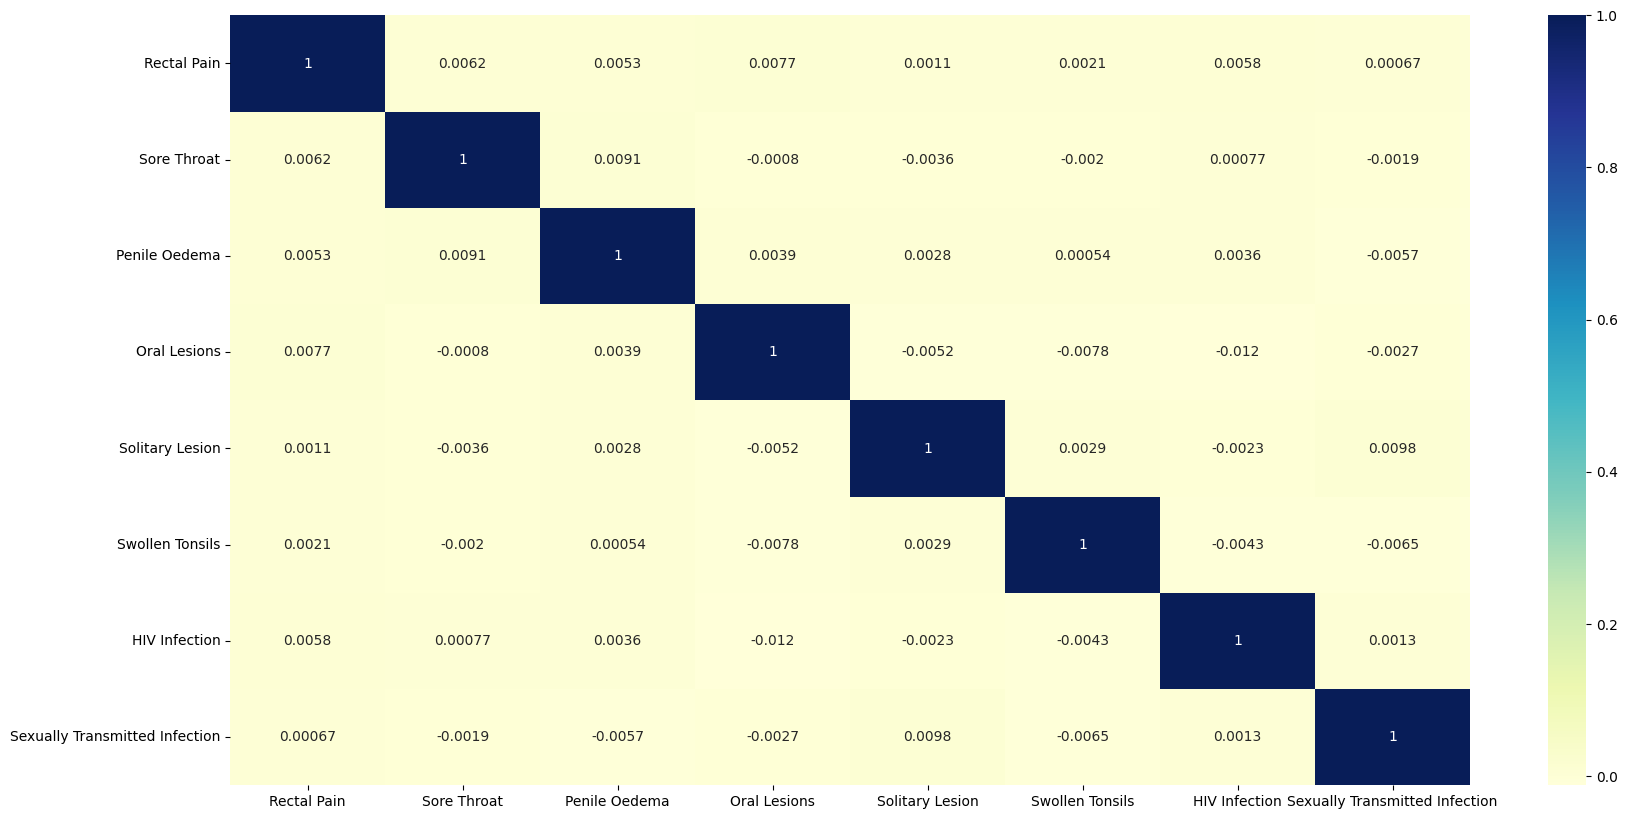

In [23]:
plt.figure(figsize = (20, 10))
var = mp.corr()
sns.heatmap(var, annot = True, cmap = "YlGnBu");

## DATA PREPARATION

In [24]:
# Checking on the uniue value counts in Systemic Illness
mp['Systemic Illness'].value_counts()

Fever                    6382
Swollen Lymph Nodes      6252
None                     6216
Muscle Aches and Pain    6150
Name: Systemic Illness, dtype: int64

In [25]:
# Reducing ambiguity in the systemic illness column we change none to No systemic Illness

mp['Systemic Illness'].replace(to_replace= 'None',value= 'No Systemic Illness',inplace= True)

In [26]:
# Confirming change
mp['Systemic Illness'].value_counts()

Fever                    6382
Swollen Lymph Nodes      6252
No Systemic Illness      6216
Muscle Aches and Pain    6150
Name: Systemic Illness, dtype: int64

From the above info we can see that all the columns have only two unique values meaning converting to int will not be as complicated.

Systemic illness has the most with 4.

data cleaning will be relatievly easy as the data has no missing values and no duplicates.

Only task is type casting.


In [31]:
# type casting Systemic illness by using get dummies
df = pd.get_dummies(data= mp, columns= ['Systemic Illness'],drop_first= False)
# dropping every other column to isolate the systemic illness ...will concat later.
df_Systemic = df.drop(columns= col,axis = 1)
df_Systemic = df_Systemic.drop(columns= ['Systemic Illness_No Systemic Illness'],axis = 1)
df_Systemic

,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes
Patient_ID,,,
P0,0,0,0
P1,1,0,0
P2,1,0,0
P3,0,0,0
P4,0,0,1
...,...,...,...
P24995,0,0,0
P24996,1,0,0
P24997,0,0,0


In [32]:
df_d = pd.get_dummies(data = mp, columns= col, drop_first= True)
df_d

,Systemic Illness,Rectal Pain_True,Sore Throat_True,Penile Oedema_True,Oral Lesions_True,Solitary Lesion_True,Swollen Tonsils_True,HIV Infection_True,Sexually Transmitted Infection_True,MonkeyPox_Positive
Patient_ID,,,,,,,,,,
P0,No Systemic Illness,0,1,1,1,0,1,0,0,0
P1,Fever,1,0,1,1,0,0,1,0,1
P2,Fever,0,1,1,0,0,0,1,0,1
P3,No Systemic Illness,1,0,0,0,1,1,1,0,1
P4,Swollen Lymph Nodes,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
P24995,No Systemic Illness,1,1,0,1,1,0,0,1,1
P24996,Fever,0,1,1,0,1,1,1,1,1
P24997,No Systemic Illness,1,1,0,0,1,1,0,0,1


In [33]:
# Dropping Systemic illness as its already dummied out

df_d.drop(axis = 1, columns= ['Systemic Illness'] ,inplace = True)


In [34]:
# Column names will have to be changed but that can be done in one go
# first we finish up on converting the column data types t a usable state.
df_d.head()

,Rectal Pain_True,Sore Throat_True,Penile Oedema_True,Oral Lesions_True,Solitary Lesion_True,Swollen Tonsils_True,HIV Infection_True,Sexually Transmitted Infection_True,MonkeyPox_Positive
Patient_ID,,,,,,,,,
P0,0,1,1,1,0,1,0,0,0
P1,1,0,1,1,0,0,1,0,1
P2,0,1,1,0,0,0,1,0,1
P3,1,0,0,0,1,1,1,0,1
P4,1,1,1,0,0,1,1,0,1


In [36]:
df_clean = pd.concat([df_Systemic,df_d], axis = 1,join= 'inner')
df_clean

,Systemic Illness_Fever,Systemic Illness_Muscle Aches and Pain,Systemic Illness_Swollen Lymph Nodes,Rectal Pain_True,Sore Throat_True,Penile Oedema_True,Oral Lesions_True,Solitary Lesion_True,Swollen Tonsils_True,HIV Infection_True,Sexually Transmitted Infection_True,MonkeyPox_Positive
Patient_ID,,,,,,,,,,,,
P0,0,0,0,0,1,1,1,0,1,0,0,0
P1,1,0,0,1,0,1,1,0,0,1,0,1
P2,1,0,0,0,1,1,0,0,0,1,0,1
P3,0,0,0,1,0,0,0,1,1,1,0,1
P4,0,0,1,1,1,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
P24995,0,0,0,1,1,0,1,1,0,0,1,1
P24996,1,0,0,0,1,1,0,1,1,1,1,1
P24997,0,0,0,1,1,0,0,1,1,0,0,1


In [37]:
list(df_clean.columns)

['Systemic Illness_Fever',
 'Systemic Illness_Muscle Aches and Pain',
 'Systemic Illness_Swollen Lymph Nodes',
 'Rectal Pain_True',
 'Sore Throat_True',
 'Penile Oedema_True',
 'Oral Lesions_True',
 'Solitary Lesion_True',
 'Swollen Tonsils_True',
 'HIV Infection_True',
 'Sexually Transmitted Infection_True',
 'MonkeyPox_Positive']

In [38]:
df_clean.rename(columns={'Systemic Illness_Fever':'SI_Fever',
                        'Systemic Illness_Muscle Aches and Pain':'SI_Muscle_Aches&Pain',
                        'Systemic Illness_Swollen Lymph Nodes':'SI_Swollen_Lymph_Nodes',
                        'Rectal Pain_True':'Rectal_Pain',
                        'Sore Throat_True':'Sore_Throat',
                        'Penile Oedema_True':'Penile_Oedema',
                        'Oral Lesions_True':'Oral_Lesions',
                        'Solitary Lesion_True':'Solitary_Leision',
                        'Swollen Tonsils_True':'Swollen_Tonsils',
                        'HIV Infection_True':'HIV_Infection',
                        'Sexually Transmitted Infection_True':'STI',
                        'MonkeyPox_Positive':'Target'},inplace=True)
df_clean.head(10)

,SI_Fever,SI_Muscle_Aches&Pain,SI_Swollen_Lymph_Nodes,Rectal_Pain,Sore_Throat,Penile_Oedema,Oral_Lesions,Solitary_Leision,Swollen_Tonsils,HIV_Infection,STI,Target
Patient_ID,,,,,,,,,,,,
P0,0,0,0,0,1,1,1,0,1,0,0,0
P1,1,0,0,1,0,1,1,0,0,1,0,1
P2,1,0,0,0,1,1,0,0,0,1,0,1
P3,0,0,0,1,0,0,0,1,1,1,0,1
P4,0,0,1,1,1,1,0,0,1,1,0,1
P5,0,0,1,0,1,0,0,0,0,0,0,0
P6,1,0,0,0,1,0,0,0,0,1,0,1
P7,1,0,0,1,1,0,1,1,1,0,0,1
P8,0,1,0,0,1,1,1,0,0,0,0,1


In [39]:
# splitting the data into X [predictors] and y [target]
X = df_clean.drop(columns= ['Target'],axis = 1)
y = df_clean['Target']

# Random state for reapetability, test size of 30% as it is the optimum
# Stratify is used to ensure the test and train data have the same ratio

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0,test_size= 0.3,stratify= y)